In [78]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load Data 



In [79]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [80]:
df.shape

(346, 10)

### Make datetime



In [81]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


In [82]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

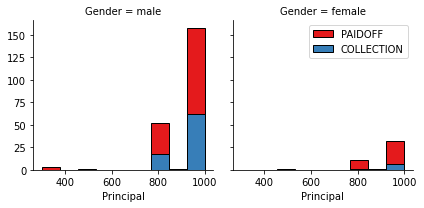

In [83]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

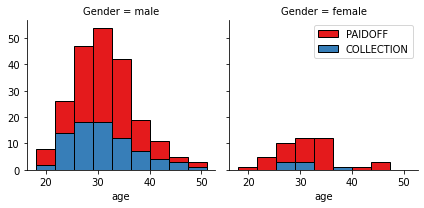

In [84]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


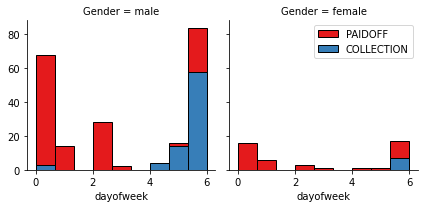

In [85]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [86]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [87]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Let's convert male to 0 and female to 1:


In [88]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


### One-hot encoding


In [89]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [90]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Convert categorical varables to binary variables and append them to the features set


In [91]:
Feature = df[['Principal','terms','age','Gender', 'weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


In [92]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [93]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


In [94]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# K Nearest Neighbor(KNN)


Best K is: 1
0.87283


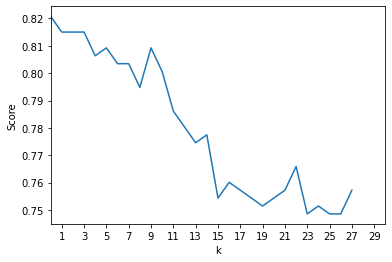

In [95]:
from sklearn.neighbors import KNeighborsClassifier

#### Testing ####

temp = list()
n = 30
for i in range(1, n):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X,y)
    temp.append(knn.score(X,y))
    
    
#### Score #####



print('Best K is: ' + str(temp.index(max(temp))+1) + '\n' + str(round(max(temp),5)))


plt.plot(temp[1:])
plt.xlim([0,n])
plt.xticks(np.arange(1, n, 2))
plt.ylabel('Score')
plt.xlabel('k')
idx = temp.index(max(temp))+1


#### output ####

knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

<AxesSubplot:>

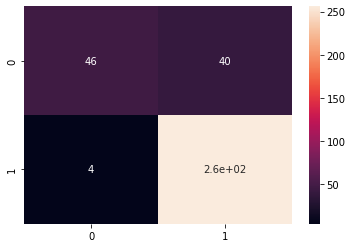

In [97]:
from sklearn.metrics import confusion_matrix

y_hat = knn.predict(X)

sns.heatmap(confusion_matrix(y, y_hat), annot=True)

# Decision Tree


In [98]:
from sklearn import tree

#We've already have numeric values, so i dont use label encoder


dec_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 9)
dec_tree.fit(X,y)
dec_tree.score(X,y)


0.8439306358381503

<AxesSubplot:>

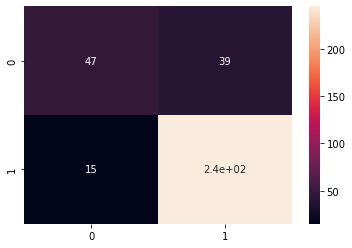

In [99]:
y_hat = dec_tree.predict(X)
y_hat
sns.heatmap(confusion_matrix(y, y_hat), annot=True)

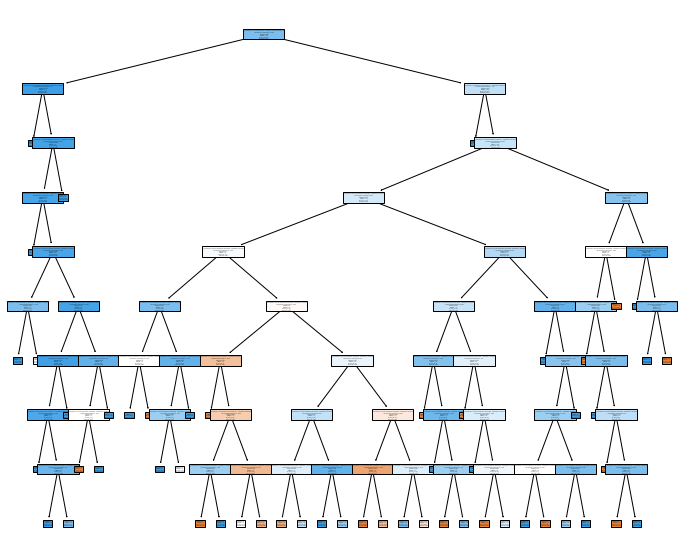

In [100]:
fig = plt.figure(figsize = (12,10))
_ = tree.plot_tree(dec_tree, 
                   feature_names=X,  
                   class_names=y,
                   filled=True)

# Support Vector Machine


In [101]:
from sklearn.svm import SVC

_ = list()
c = np.arange(1,3, 0.01)
len(c)

#check for best regularization par
for i in range(0, len(c)):
    _.append(SVC(C=c[i]).fit(X, y).score(X,y))
    
    
    
print(_.index(max(_))+1)
idx = _.index(max(_))+1


svm = SVC(C = idx)
svm.fit(X, y)
svm.score(X,y)


33


0.8092485549132948

<AxesSubplot:>

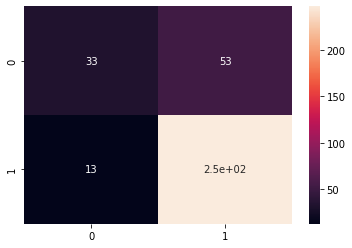

In [102]:
y_hat = svm.predict(X)
sns.heatmap(confusion_matrix(y, y_hat), annot=True)

In [104]:
from sklearn.metrics import classification_report
print (classification_report(y, y_hat))

              precision    recall  f1-score   support

  COLLECTION       0.72      0.38      0.50        86
     PAIDOFF       0.82      0.95      0.88       260

    accuracy                           0.81       346
   macro avg       0.77      0.67      0.69       346
weighted avg       0.80      0.81      0.79       346



# Logistic Regression


In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.5, solver='liblinear').fit(X,y)
y_hat = lr.predict(X)
lr.score(X,y)

0.7543352601156069

<AxesSubplot:>

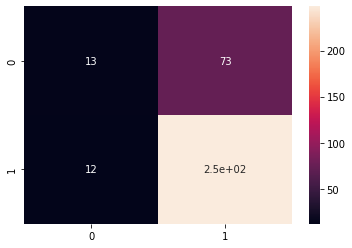

In [106]:
sns.heatmap(confusion_matrix(y, y_hat), annot=True)

In [107]:
print (classification_report(y, y_hat))

              precision    recall  f1-score   support

  COLLECTION       0.52      0.15      0.23        86
     PAIDOFF       0.77      0.95      0.85       260

    accuracy                           0.75       346
   macro avg       0.65      0.55      0.54       346
weighted avg       0.71      0.75      0.70       346



# Model Evaluation using Test set


In [108]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Load Test set for evaluation


In [109]:
############ Let's process the train data #############

test_df = pd.read_csv('loan_test.csv')
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['0','1'], value=[0,1],inplace=True)
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
print(test_df['weekend'].values)


######## X, y ########  

X_test = test_df[['Principal','terms','age','Gender', 'weekend']]
X_test = pd.concat([X_test,pd.get_dummies(test_df['education'])], axis=1)
X_test.drop(['Master or Above'], axis = 1,inplace=True)
y_test = test_df['loan_status'].values
X_test = preprocessing.StandardScaler().fit(X).transform(X)
X_test.shape

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


(346, 8)

In [131]:
##### KNN #####

y_pred_knn = knn.predict(X_test)
print('KNN Jacc Score: ' + str(jaccard_score(y,  y_pred_knn, pos_label="PAIDOFF")))
print('KNN F1-Score: ' + str(f1_score(y,  y_pred_knn, pos_label="PAIDOFF"))+'\n')


##### Decision Tree #####

y_pred_dt = dec_tree.predict(X_test)
print('Dec Tree Jacc Score: ' + str(jaccard_score(y,  y_pred_dt, pos_label="PAIDOFF")))
print('Dec Tree F1-Score: ' + str(f1_score(y,  y_pred_dt, pos_label="PAIDOFF")) + '\n')


##### SVM #####

y_pred_svm = svm.predict(X_test)
print('SVM Jacc Score: ' + str(jaccard_score(y,  y_pred_svm, pos_label="PAIDOFF")))
print('SVM F1-Score: ' + str(f1_score(y,  y_pred_svm, pos_label="PAIDOFF"))+'\n')

##### Logistic Regression ##### 

y_pred_lr = lr.predict(X_test)
print('Log Reg Jacc Score: ' + str(jaccard_score(y,  y_pred_lr, pos_label="PAIDOFF")))
print('Log Reg F1-Score: ' + str(f1_score(y,  y_pred_lr, pos_label="PAIDOFF")))

y_hat_proba = lr.predict_proba(X_test)
print(f'Log-loss: {log_loss(y, y_hat_proba)}'  )

KNN Jacc Score: 0.8533333333333334
KNN F1-Score: 0.920863309352518

Dec Tree Jacc Score: 0.8193979933110368
Dec Tree F1-Score: 0.900735294117647

SVM Jacc Score: 0.7891373801916933
SVM F1-Score: 0.8821428571428571

Log Reg Jacc Score: 0.7447447447447447
Log Reg F1-Score: 0.8537005163511188
Log-loss: 0.43548448105151755


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.85       | 0.92        | NA      |
| Decision Tree      | 0.82       | 0.90        | NA      |
| SVM                | 0.79       | 0.88       | NA      |
| LogisticRegression | 0.74       | 0.85        | 0.53       |
